In [1]:
import galc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
This will be an example of a quick integration of a simple, homogenous fireball.
'''
# instantiate a new fireball object with the desired parameters.
# in this case, the binning is low to speed things up
grblc = galc.Lightcurve(nu_obs = 7e14, n_theta = 500, n_phi = 10, E_iso = 1e48, G_0 = 1e3)

# this starts the integration.  start_time and end_time give the log of the times, in days.
grblc_data = grblc.time_evolve(start_time = -5, end_time = 1)

 Calculating laboratory time... 99.6%
 Time evolving... 100.0%


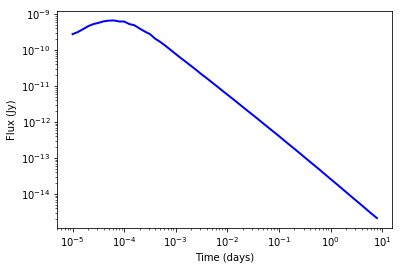

In [3]:
# Now we can plot the data.  The plotting function can be passed any matplotlib aesthetics parameter.
galc.plot_curve(grblc_data, units = 'Jy', z = 1, linewidth = 2, color = 'blue')
plt.ylabel('Flux (Jy)')
plt.xlabel('Time (days)')
plt.show()

In [4]:
'''
Now we can do an example of a calculation where the isotropic energy
and initial Lorentz factors are read from a file.
'''

# Lacking an actual lorentz distribution, I'll make some dummy data
lorentz_distribution = np.zeros((158,2))
lorentz_distribution[:, 0] = np.linspace(0, np.pi/2, 158)
lorentz_distribution[:, 1] = np.linspace(900, 1200, 158)
# save it into a file called 'dummy_lorentz.dat'
np.savetxt('dummy_lorentz.dat', lorentz_distribution)

In [5]:
# Now, when we're creating the new instance, we still need to specify the number of theta bins.
# It doesn't matter if there are more bins than there are rows in the energy and lorentz data;
# That data is just interpolated anyway.
grblc2 = galc.Lightcurve(nu_obs = 7e14,
                         n_theta = 500,
                         n_phi = 10,
                         jet_type = 'numerical',
                         E_iso = 'de_do.dat',
                         G_0 = 'dummy_lorentz.dat')

grblc2_data = grblc2.time_evolve(start_time = -5, end_time = 1)

 Calculating laboratory time... 99.6%
 Time evolving... 100.0%


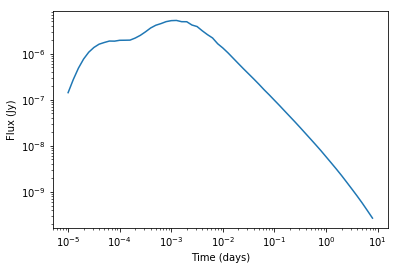

In [6]:
galc.plot_curve(grblc2_data, units = 'Jy')
plt.ylabel('Flux (Jy)')
plt.xlabel('Time (days)')
plt.show()

Calculating for theta = 0.0 degrees
 Calculating laboratory time... 96.1%
 Time evolving... 100.0%
Calculating for theta = 22.5 degrees
 Calculating laboratory time... 96.1%
 Time evolving... 100.0%
Calculating for theta = 45.0 degrees
 Calculating laboratory time... 96.1%
 Time evolving... 100.0%
Calculating for theta = 67.5 degrees
 Calculating laboratory time... 96.1%
 Time evolving... 100.0%
Calculating for theta = 90.0 degrees
 Calculating laboratory time... 96.1%
 Time evolving... 100.0%


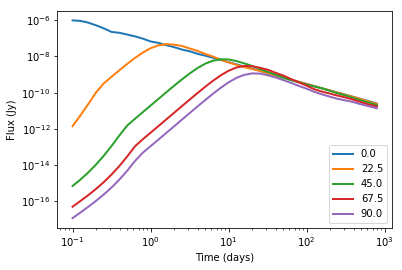

In [7]:
'''
Finally, we can write a script to go through a bunch of values of some parameter,
calculate the lightcurves, and plot the results on the same plot.
'''

# set up the matplotlib figure
fig = plt.figure()
ax1 = fig.add_subplot(111)

grblc3 = galc.Lightcurve(nu_obs = 5e13, E_iso = 1e52, G_0 = 1e3, n_theta = 50, n_phi = 10)

# Let's say you want the lightcurves from a range of observing angles
for theta in np.linspace(0, 90, 5):
    print('Calculating for theta = {} degrees'.format(theta))

    grblc3.set_theta_obs(theta)
    
    data = grblc3.time_evolve(-1,3)
    
    # plot the resulting data on the axis established above
    galc.plot_curve(data, ax = ax1, units = 'Jy', linewidth = 2, label = theta)

plt.ylabel('Flux (Jy)')
plt.xlabel('Time (days)')
plt.legend()
plt.show()